# ICS 434 Homework Assignment 4

# <font color="red">Due: 11:59 PM on Friday, April 14</font>

### *Refer to the `Homework submission guidelines` in Laulima for preparing and submitting your homework.*


## Your Name: Christine Nakano

***

In [1]:
# IMPORT RELEVANT LIBRARIES HERE
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from statsmodels.tsa.stattools import acf

## Part 1: Understanding the Components of Time Series Data Set

First, you'll simulate a time series dataset. This will help us better understand the components of a time series and the concepts underlying time series analysis and grok, so to speak, the steps that go into modeling time series using a generative modeling approach. In other words, given the time series plotted below, our goal is to build a dataset that is most similar to it.

<img src="images/simulated_dataset.png" alt="drawing" style="width:800px;"/>

Use your understanding of how seasonality, trend and noise interact in a time series to generate dataset similar to the one above.
The information that you need to reproduce this dataset is provided below:

* The data contains 200 months worth of data.

* The trend is an exponential function: 

$$y = 1.01^x $$

* The seasonality in this dataset is quarterly (period of 6 months) and is a sine curve with an amplitude of 1.2.

* The noise is Gaussian with a mean of $\mu=0$ and a standard deviation of $\sigma=1$, scaled by 0.5.

**1. Compute and plot each of the components of your time series independently.**

* Plot your data to verify your solution. 
  * You need to add an appropriate offset to the trend values to match the given plot.
  * Use the following seed for simulating random noise so that graph matches the one below exactly. 

```
        np.random.seed(42)
```

* Your plots should look like the following:

<img src="images/three_plots.png" alt="drawing" style="width:600px">

In [2]:
# WRITE YOUR CODE FOR SIMULATING THE TREND
x = np.arange(0, 200)
trend = np.zeros(len(x))

for i , _ in enumerate(x):
    trend[i] = np.power(1.01, x[i]) + 29

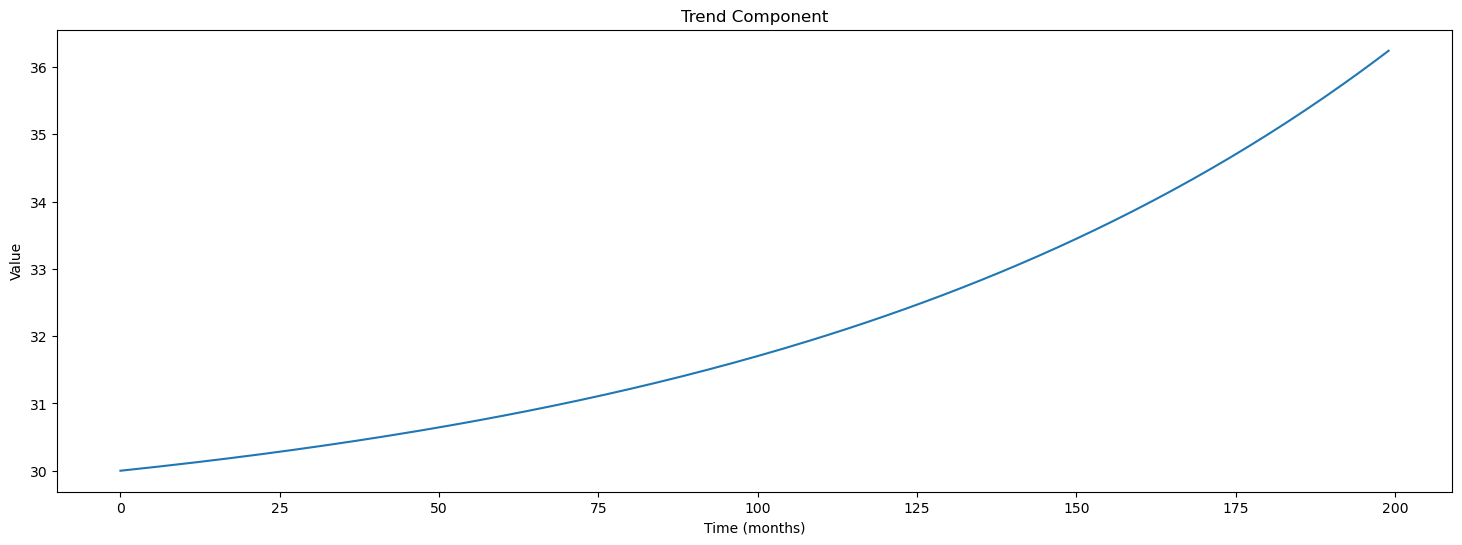

In [3]:
# PLOT YOUR TREND
plt.figure(figsize=(18, 6))
plt.plot(x, trend)
plt.title('Trend Component')
plt.xlabel('Time (months)')
plt.ylabel('Value')
plt.show()

In [4]:
# WRITE YOUR CODE FOR SIMULATING THE SEASONALITY
x = np.arange(0, 200, 0.25)
seasonality = np.zeros(len(x))

for i , _ in enumerate(x):
    seasonality[i] = 1.2 * (np.sin((2 * np.pi)/ 6  * x[i]))

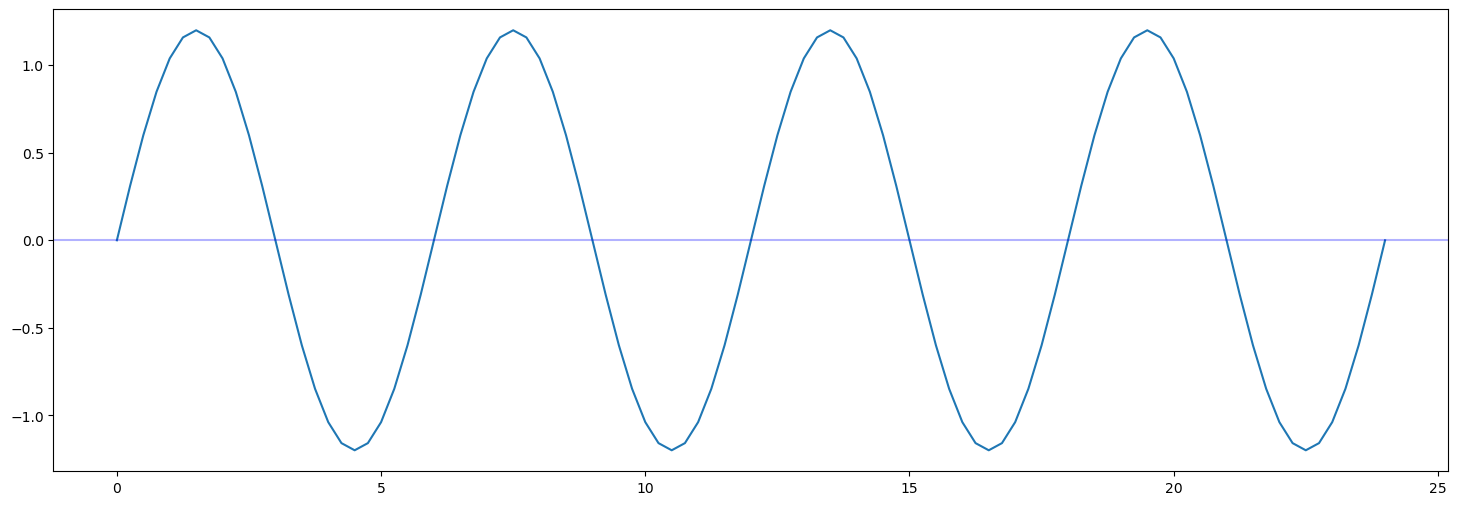

In [5]:
# PLOT YOUR SEASONALITY 
plt.figure(figsize=(18, 6))
plt.plot(x[0:97], seasonality[0:97])
plt.axhline(0, color='blue', alpha=0.3)

In [6]:
# WRITE YOUR CODE FOR SIMULATING THE RANDOM NOISE
x = np.arange(0, 200)
# Set the seed for reproducibility
np.random.seed(42)

noise = np.zeros(len(x))

for i , _ in enumerate(x):
    noise[i] = 0.5 * np.random.normal(0.0, 1.0)

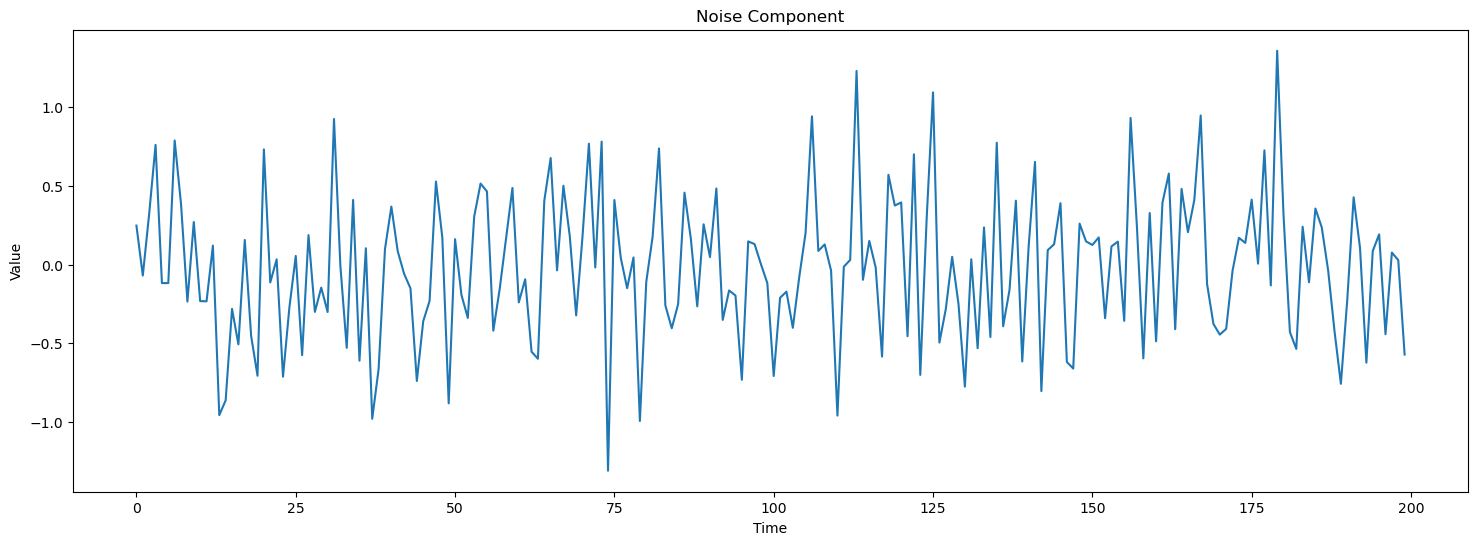

In [7]:
# PLOT YOUR RANDOM NOISE
plt.figure(figsize=(18, 6))
plt.plot(noise[0:200])
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Noise Component')
plt.show()

**2. Generate the time series by combining the three components.**

* Compute and plot your combined signal. The resulting graph should look like the graph shown at the beginning of this assignment.

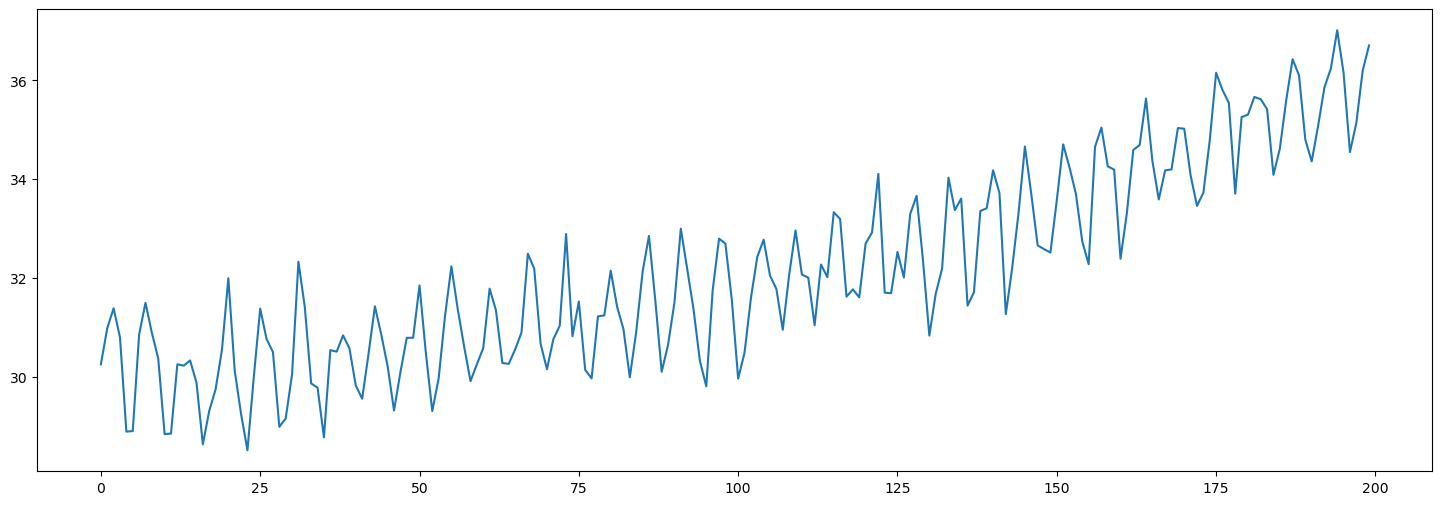

In [24]:
# Time series by combining the three components
x = np.arange(0, 200)

# create arrays of zero for trend, seasonality, and noise with length of array x
trend = np.zeros(len(x))
seasonality = np.zeros(len(x))
noise = np.zeros(len(x))

# simulate the trend, seasonality, and noise values
for i , _ in enumerate(x):
    trend[i] = np.power(1.01, x[i]) + 29
    seasonality[i] = 1.2 * (np.sin(2 * x[i] * (np.pi / 6)))
    noise[i] = 0.5 * np.random.normal(0.0, 1.0)
    
# plot    
plt.figure(figsize=(18, 6))
plt.plot(x, trend + seasonality + noise)

**3. Compute the autocorrelation for the 30 first lags and observe that lags 6, 12, 18, 24 represent the 1st, 2nd, 3rd, and 4th highest lags, respectively.**

* You can use `acf` imported from `statsmodels.tsa.stattools` to compute the autocorrelation.

* Your graph should be similar to the graph below. (Your plot should show the values for all lags.)

<img src="images/acf_simulated.png" alt="drawing" style="width:600px">

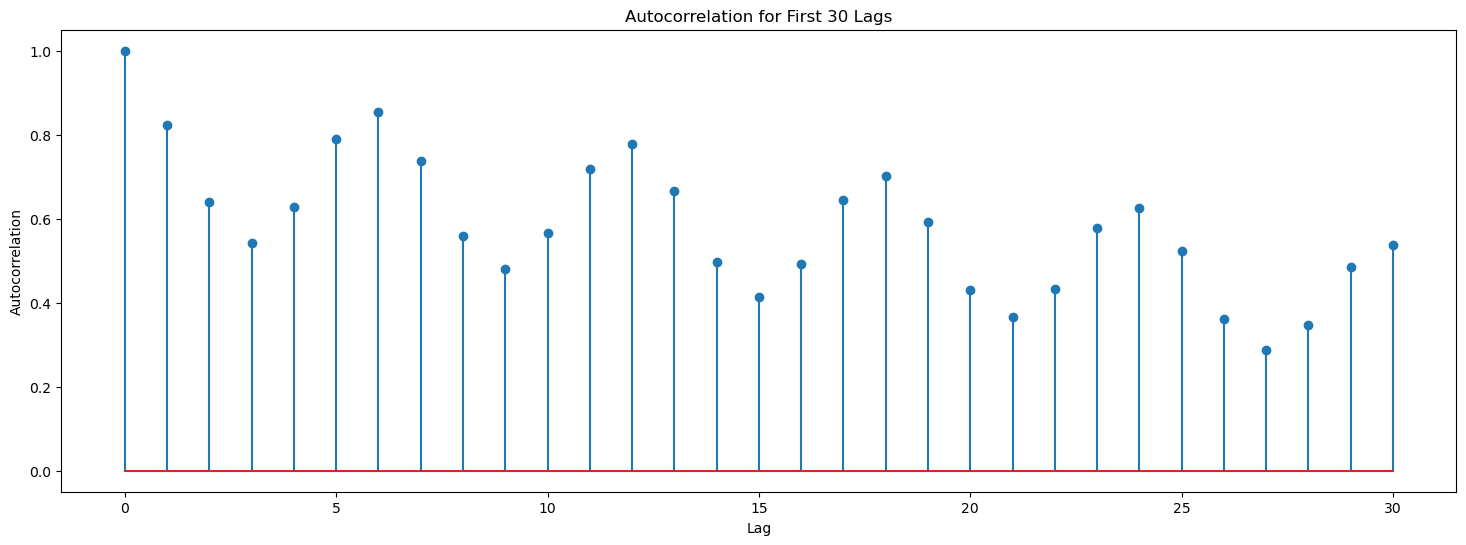

In [9]:
# Compute the autocorrelation for the first 30 lags
lags = 30
acf_vals, confint = acf(trend + seasonality + noise, nlags=lags, alpha=0.05)

# Plot the autocorrelation values
plt.figure(figsize=(18,6))
plt.stem(np.arange(lags+1), acf_vals)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for First 30 Lags')
plt.show()

**4. What does the graph above tell you about the trend in the data?  How would you explain it to a colleague who is not familiar with the ACF plots nor how they can be used to assess whether there is a trend in the data?**

> **WRITE YOUR ANSWER HERE**: The graph allows us to see how much the past data affects the present ones. The first point, 0, is always 1 since it is the only value at the beginning. The following value, 1, is just over 80% of the previous value. The reason why we observe higher lags in the 6, 12, 18, 24, and 30th lags is because of the seasonality of the data, meaning there is a cycle period of 6 months.
><br>
> 

While the example above focused on a single sine wave with an amplitude of 1.2 and a period of 6 months, real-time series often have other embedded signals. For instance, in addition to a quarterly seasonality, the data may contain a less robust monthly signal.

* A less robust monthly signal here means that the signal has a weaker (smaller) amplitude.
    1. Let's assume the amplitude here is 0.7.
    2. The signal's period is 3 months.

**5. Plot the second harmonic based on the information above.** 
* Include the first harmonic signal as a reference. Your plot should look like the following.

<img src="images/harmonic_example.png" alt="drawing" style="width:700px">

* Do not forget to label the lines.

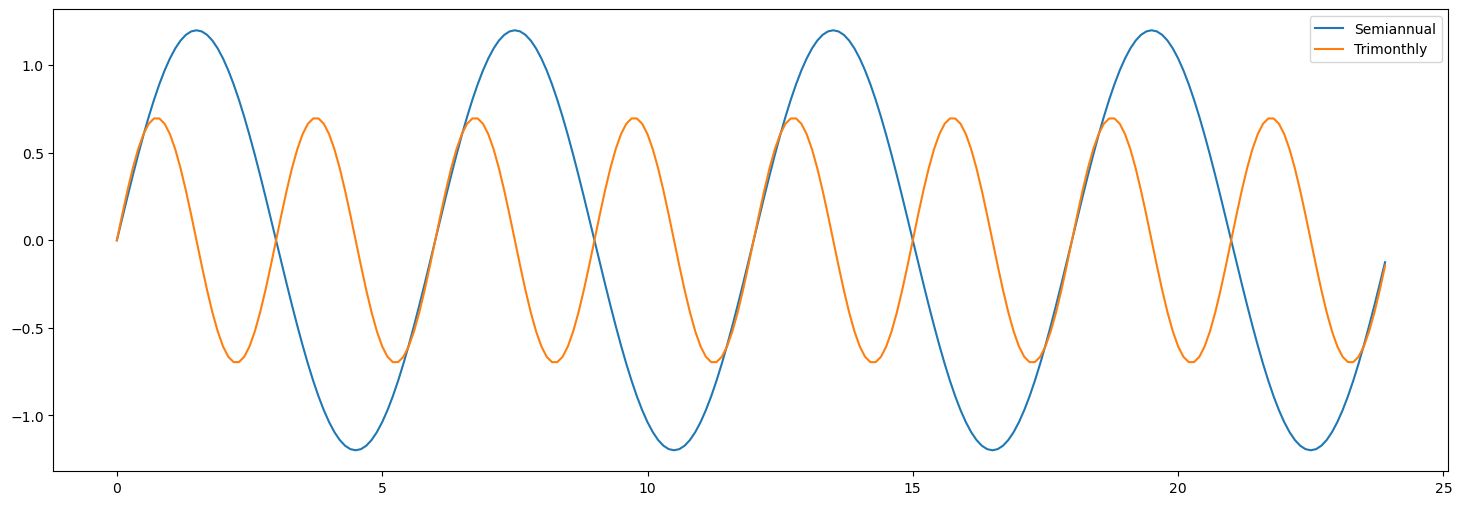

In [10]:
# create x axis, seasonality, and second seasonality arrays
x = np.arange(0, 200, 0.10)
first_harmonic = np.zeros(len(x))
second_harmonic = np.zeros(len(x))

# simulate seasonality values
for i , _ in enumerate(x):
    first_harmonic[i] = 1.2 * (np.sin(2 * x[i] * (np.pi / 6)))
    second_harmonic[i] = 0.7 * (np.sin(2 * x[i] * (np.pi / 3)))

# plot the harmonics
plt.figure(figsize=(18, 6))
plt.plot(x[0:240], first_harmonic[0:240], label="Semiannual")    
plt.plot(x[0:240], second_harmonic[0:240], label="Trimonthly") 
plt.legend()

**6. Plot the full seasonality, which includes the first and the second harmonics.** 
* Your plot should look like the following.

<img src="images/combined_sines.png" alt="drawing" style="width:700px">

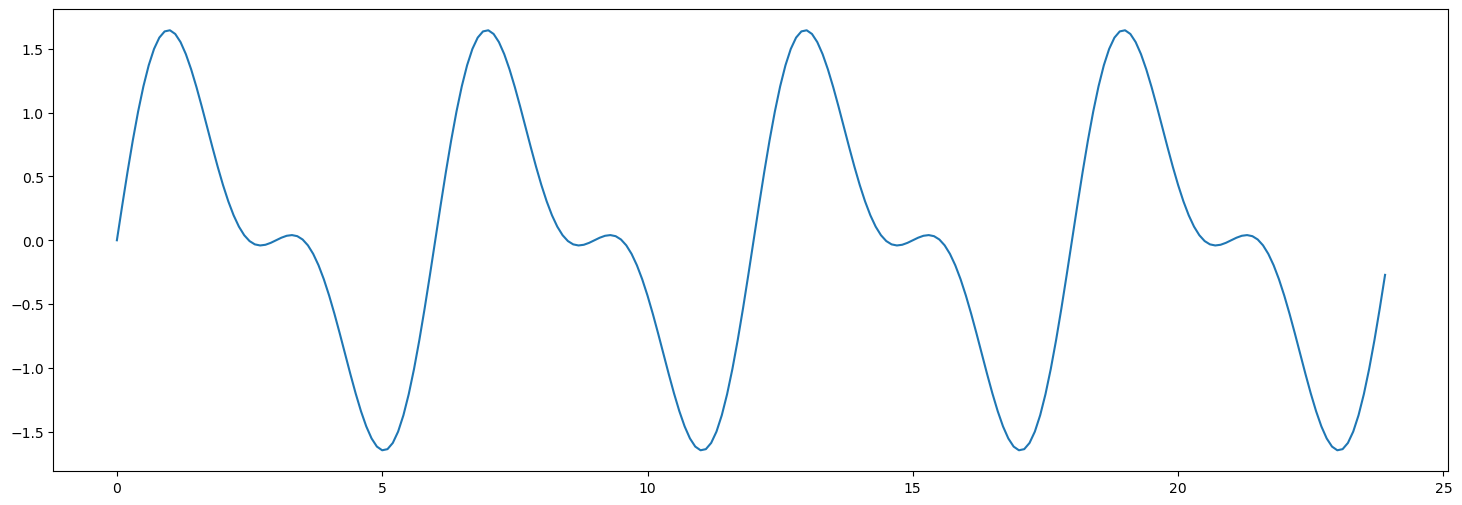

In [11]:
# plot combined harmonic graph
plt.figure(figsize=(18, 6))
full_seasonality = first_harmonic + second_harmonic
plt.plot(x[0:240], full_seasonality[0:240])

**7. Generate the new time series, which includes the trend, full seasonality, and the stochastic noise.**
* Your final results should look like the following.

<img src="images/signal_with_harmonics.png" alt="drawing" style="width:700px">

Text(0.5, 1.0, 'Time Series with Trend, Seasonality with 2nd Harmonic, and Noise')

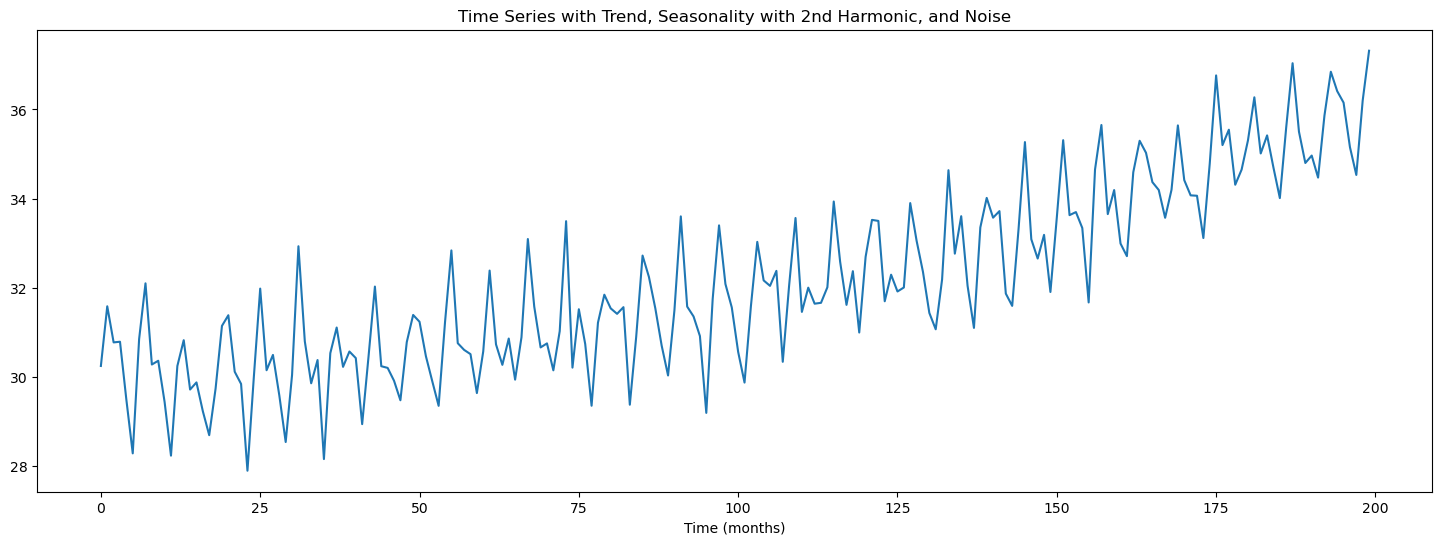

In [25]:
np.random.seed(42)

x = np.arange(0,200,1)
# create arrays of zero for seasonality with length of array x
q_seasonality = np.zeros(len(x))
m_seasonality = np.zeros(len(x))

for i, _ in enumerate(x):
    q_seasonality[i] = 1.2 * (np.sin((2 * np.pi)/ 6  * x[i]))
    m_seasonality[i] = 0.7 * (np.sin((2 * np.pi)/ 3  * x[i]))

t_seasonality = q_seasonality + m_seasonality
data = trend + noise + t_seasonality

plt.figure(figsize = (18,6))
plt.plot(x, data)
plt.xlabel('Time (months)')
plt.title('Time Series with Trend, Seasonality with 2nd Harmonic, and Noise')

## Part 2: Time Series Modeling of Passenger Counts for Internationals Departing from LAX

Initially, the approach used here will be very similar to that used above. We will see that not all that looks seasonal can be easily fitted using a line but can be forecasted using triple exponential smoothing instead. (The implementation of triple exponential smoothing is not included in this assignment though.)

We will be using a dataset reporting the Los Angeles International Airport Passenger Traffic by Terminal. The data is in the file `data/LAX_final.csv`. The dataset contains multiple fields, but we are only interested in modeling the international departures from LAX between 2009 and 2017. 

**1. Load the data as a pandas DataFrame.** 

* Name your DataFrame as `lax`.

* Convert the data type of `ReportPeriod` column to `datetime` using pandas `to_datetime` method.
  * The resulting format should be `yyyy-mm-dd` (e.g., 2007-02-01).
  * Verify that the data type of the column is `datetime`.

* Use `head()` to make sure the data was read correctly and the `ReportPeriod` coulum appears in correct format. 

In [13]:
# load the data as a pandas DataFrame
lax = pd.read_csv('data/LAX_final.csv')

# convert ReportPeriod column to datetime
lax['ReportPeriod'] = pd.to_datetime(lax['ReportPeriod'], format='%m/%d/%Y %I:%M:%S %p')

# verify that the data type of the column is datetime
print(lax['ReportPeriod'].dtype)

# use head() to make sure the data was read correctly
print(lax.head())

datetime64[ns]
  ReportPeriod           Terminal Arrival_Departure Domestic_International  \
0   2006-01-01  Imperial Terminal           Arrival               Domestic   
1   2006-01-01  Imperial Terminal         Departure               Domestic   
2   2006-01-01     Misc. Terminal           Arrival               Domestic   
3   2006-01-01     Misc. Terminal         Departure               Domestic   
4   2006-01-01         Terminal 1           Arrival               Domestic   

   Passenger_Count  
0              490  
1              498  
2              753  
3              688  
4           401535  


**2. Data preparation**

We are only interested in values associated with international departures. 

* Write an expression to retain only lines where "Arrival_Departure" is equal to "Departure" and "Domestic_International" is equivalent to "International."
 
We are also only interested in the columns `ReportPeriod` (i.e., the period covered) and the `Passenger_Count`, the number of passengers reported during that period. 

* Create a new  `DataFrame`  (`Lax_int_dep`) which contains only these two columns and only international departures. 

In [14]:
# filter the DataFrame to retain only international departures
Lax_int_dep = lax.loc[(lax['Arrival_Departure'] == 'Departure') & (lax['Domestic_International'] == 'International'), ['ReportPeriod', 'Passenger_Count']]

# print the first few rows of the DataFrame to verify that it was created correctly
print(Lax_int_dep.head())

   ReportPeriod  Passenger_Count
6    2006-01-01              561
10   2006-01-01           156751
14   2006-01-01            60948
18   2006-01-01            42256
22   2006-01-01            25531


**3. Compute the total number of passengers (`Passenger_Count`) per month.**

* Call your new DataFrame `lax_totals`. 
* Use the `shape` attribute to make sure that your resulting DataFrame matches the expected results --  recall that the data have reported values for January 2006 through January 2019.

In [15]:
# group by month and sum the passenger counts
lax_totals = Lax_int_dep.groupby(pd.Grouper(key='ReportPeriod', freq='M'))['Passenger_Count'].sum().reset_index()

# display the resulting DataFrame and its shape
print(lax_totals.head())
print(lax_totals.shape)

  ReportPeriod  Passenger_Count
0   2006-01-31           695800
1   2006-02-28           600008
2   2006-03-31           680319
3   2006-04-30           672268
4   2006-05-31           723954
(157, 2)


According to [news reports](https://skift.com/2018/09/14/10-years-later-how-the-travel-industry-came-back-from-the-financial-crisis/), travel in 2009 was "ravaged" after the [financial crisis of 2007-2008](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%932008).

**4. Plot the data and see for yourself that the number right after 2009 are significantly lower than during the 2006-2008 period.** 

* Your plot should look like the following.

<img src="images/lax_complete.png" alt="drawing" style="width:800px">


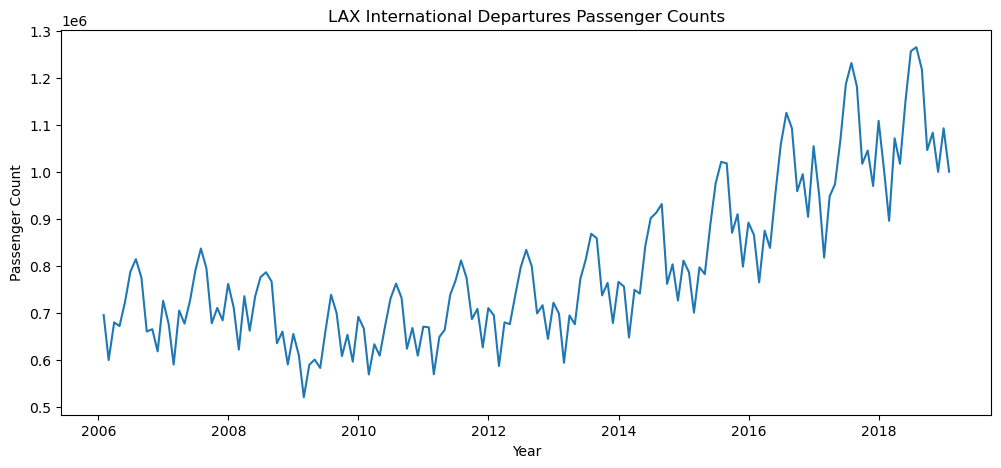

In [16]:
# plot the passenger counts over time
plt.figure(figsize=(12, 5))
plt.plot(lax_totals['ReportPeriod'], lax_totals['Passenger_Count'])
plt.title('LAX International Departures Passenger Counts')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.show()

It would be reasonable to remove data before the 2009 financial crisis so that the model is not affected by this `rare` anomaly. 

**5. Build a new `DataFrame` and call it `lax_totals_post_08`.**

* Use `shape` to make sure the data contains the expected number of entries. It should contain 12 entries for each of the years 2009 through 2018. Plus January 2019.

In [17]:
lax_totals_post_08 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2009-01-01')]
print(lax_totals_post_08.shape)

lax_totals_09 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2009-01-01') & (lax_totals['ReportPeriod'] < '2010-01-01')]
lax_totals_10 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2010-01-01') & (lax_totals['ReportPeriod'] < '2011-01-01')]
lax_totals_11 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2011-01-01') & (lax_totals['ReportPeriod'] < '2012-01-01')]
lax_totals_12 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2012-01-01') & (lax_totals['ReportPeriod'] < '2013-01-01')]
lax_totals_13 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2013-01-01') & (lax_totals['ReportPeriod'] < '2014-01-01')]
lax_totals_14 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2014-01-01') & (lax_totals['ReportPeriod'] < '2015-01-01')]
lax_totals_15 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2015-01-01') & (lax_totals['ReportPeriod'] < '2016-01-01')]
lax_totals_16 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2016-01-01') & (lax_totals['ReportPeriod'] < '2017-01-01')]
lax_totals_17 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2017-01-01') & (lax_totals['ReportPeriod'] < '2018-01-01')]
lax_totals_18 = lax_totals.loc[(lax_totals['ReportPeriod'] >= '2018-01-01') & (lax_totals['ReportPeriod'] < '2019-01-01')]
lax_totals_19 = lax_totals.loc[(lax_totals['ReportPeriod'] == '2019-01-01')]

print(f'2009 entries = {lax_totals_09.shape[0]}')
print(f'2010 entries = {lax_totals_10.shape[0]}')
print(f'2011 entries = {lax_totals_11.shape[0]}')
print(f'2012 entries = {lax_totals_12.shape[0]}')
print(f'2013 entries = {lax_totals_13.shape[0]}')
print(f'2014 entries = {lax_totals_14.shape[0]}')
print(f'2015 entries = {lax_totals_15.shape[0]}')
print(f'2016 entries = {lax_totals_16.shape[0]}')
print(f'2017 entries = {lax_totals_17.shape[0]}')
print(f'2018 entries = {lax_totals_18.shape[0]}')
print(f'2019 entries = {lax_totals_19.shape[0]}')

(121, 2)
2009 entries = 12
2010 entries = 12
2011 entries = 12
2012 entries = 12
2013 entries = 12
2014 entries = 12
2015 entries = 12
2016 entries = 12
2017 entries = 12
2018 entries = 12
2019 entries = 0


**6. Plot the data to make sure the data does not contain the dip associated with 2008.**

* Your graph should look like the following.

<img src="images/lax_totals_post_08.png" alt="drawing" style="width:800px">

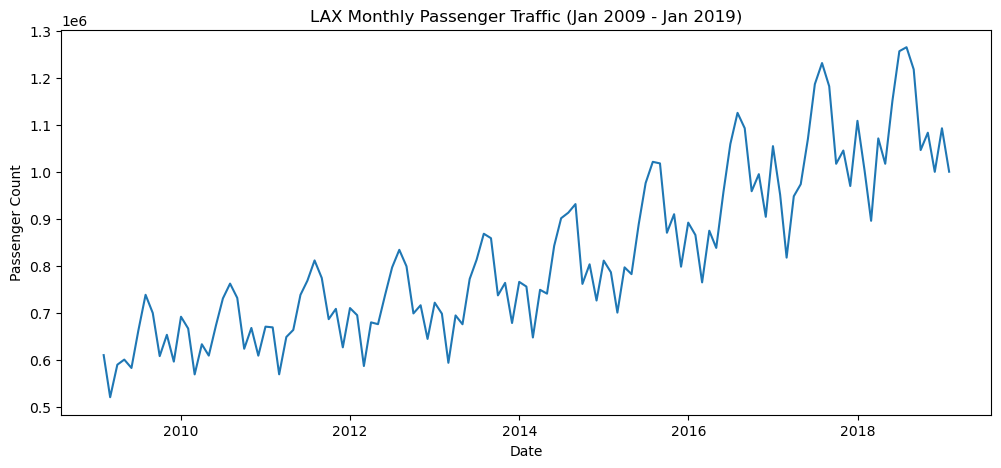

In [18]:
plt.figure(figsize=(12, 5))
plt.plot(lax_totals_post_08['ReportPeriod'], lax_totals_post_08['Passenger_Count'])
plt.title('LAX Monthly Passenger Traffic (Jan 2009 - Jan 2019)')
plt.xlabel('Date')
plt.ylabel('Passenger Count')
plt.show()

The dataset exhibits clear trends and seasonality. We will tackle the modeling of the trend prior to "attempting" to model the seasonality.

**7. Find the best fitting trend line and use it to detrend the data.** 

* You can achieve this by using the same strategy as that covered in class. Specifically,  you need to approximate the data using a power function $y = a \cdot x^b + c$, where $a$, $b$ and $c$ are the constants you need to find.

* Use the `curve_fit` from the `scipy.optimize` module to find the curve that best matches `lax_totals_post_08`.
  
* Plot your best fitting trend as well as your data. Your graph should look like the following.

<img src="images/trend.png" alt="drawing" style="width:800px">

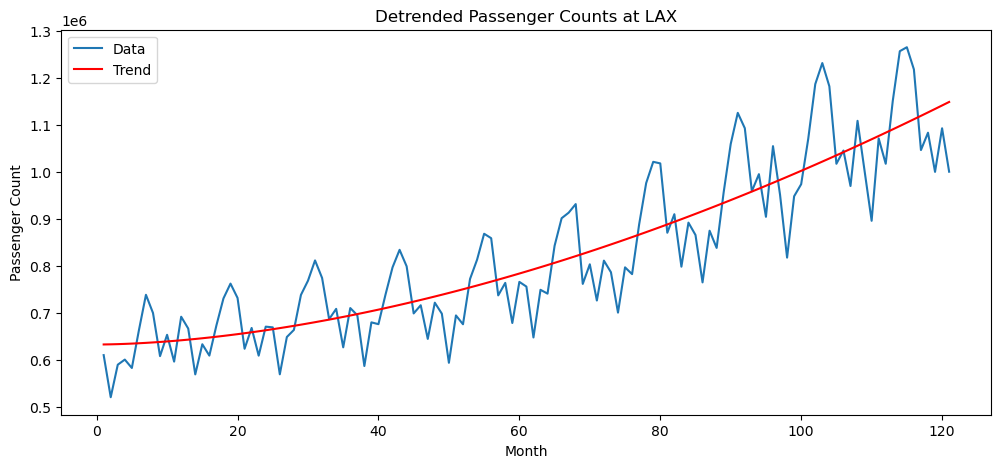

In [19]:
# Define the power function to fit the data
def power_func(x, a, b, c):
    return a * np.power(x, b) + c

# Use curve_fit to find the best fit for the power function
x = np.arange(1, len(lax_totals_post_08) + 1)
y = lax_totals_post_08['Passenger_Count'].values
popt, pcov = curve_fit(power_func, x, y)

# Plot the data and the trend line
plt.figure(figsize=(12,5))
plt.plot(x, y, label='Data')
plt.plot(x, power_func(x, *popt), 'r-', label='Trend')
plt.legend()
plt.title('Detrended Passenger Counts at LAX')
plt.xlabel('Month')
plt.ylabel('Passenger Count')
plt.show()

lax_totals_post_08_detrd = y - power_func(x, *popt)

**9. Use the autocorrelation plot, as in Problem 3 in Part 1, to find the highest correlation non-zero lag.**

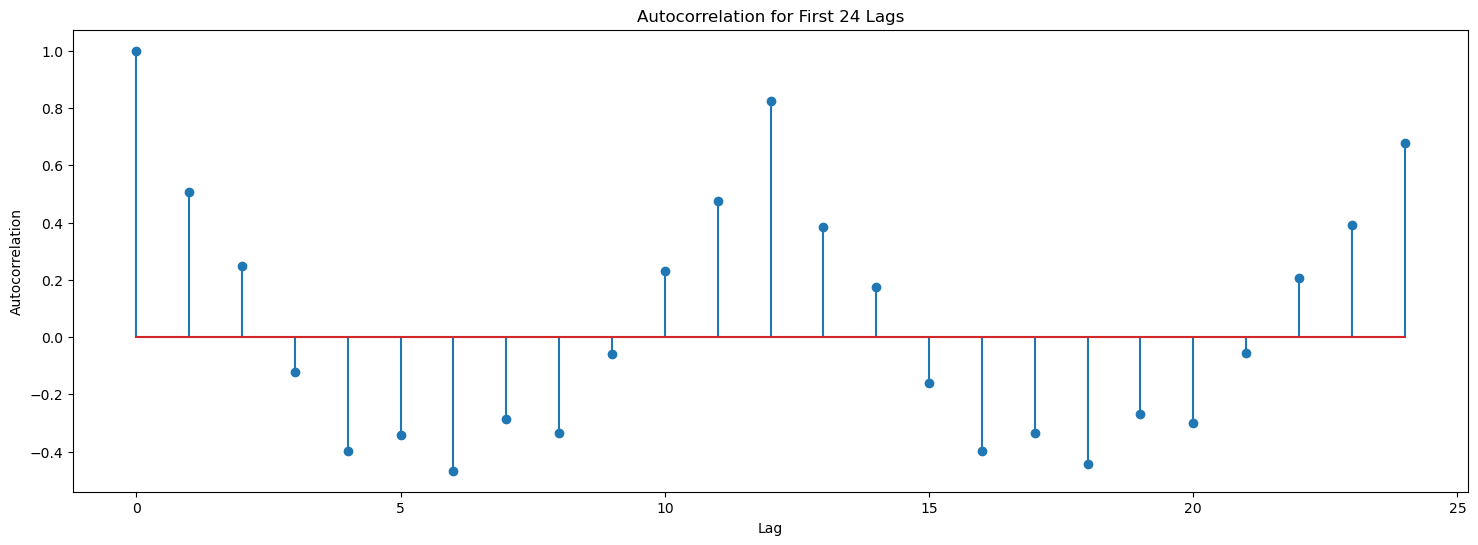

Highest correlation non-zero lag: 12


In [20]:
# Compute the autocorrelation for the first 24 lags
lags = 24
acf_vals, confint = acf(lax_totals_post_08_detrd, nlags=lags, alpha=0.05)

# Plot the autocorrelation values
plt.figure(figsize=(18,6))
plt.stem(np.arange(lags+1), acf_vals)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation for First 24 Lags')
plt.show()

# Find the highest correlation non-zero lag
max_lag = np.argmax(acf_vals[1:]) + 1

print("Highest correlation non-zero lag:", max_lag)

Rather than manually and iteratively finding all the harmonics in the signal,  the code below fits a signal using a user defined `n_harm` number of harmonincs. For instance, the fitted signal using 1, 3, 5, 10 harmonics is shown below.

<img src="images/harmonics.png" alt="drawing" style="width:1200px">

* I computed the graph above using code obtained from the following gist:
https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

In [21]:
### code from https://gist.github.com/tartakynov/83f3cd8f44208a1856ce

import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict=0, n_harm=1):
    n = x.size
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

While using a large number of harmonics improves the fits it leads to a very poor forecasting power -- this is referred to as overfitting. We will cover overfitting in more detail in future classes. 

We suspect that perhaps the data is not stationary. To quickly test this, we can compute the mean and variance of the data for the first half and the second half of the data. 

In [22]:
print(lax_totals_post_08_detrd[0:62].mean())
print(lax_totals_post_08_detrd[62:].mean())

-1956.0090299662438
2055.4670587967257


The means are largely different across the first half and the second half. This means that the variability across both subsets don't have the same parameters, indicating that the data is non-stationary, i.e., not exhibiting the same behavior all over. Non-stationary data is difficult to model and forecast using line-fitting. Modeling this date will require fitting two models that cover the different behaviors observed. This makes sense since one model can accommodate the different distributions contained across different time subsets.

Instead of modeling the data using a line, you could use triple exponential smoothing (.i.e., exponential smoothing with trend and seasonality added), which will be covered in class.